In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import IPython.display as ipd
from PIL import Image

## Step 1: Set up Docker
Run these commands
- docker build .
- ocker-compose build
- docker-compose up

In [14]:
video_paths = ["../videos/Cyclist and vehicle Tracking - 1.mp4/Cyclist and vehicle Tracking - 1.mp4", 
"../videos/Cyclist and vehicle tracking - 2.mp4/Cyclist and vehicle tracking - 2.mp4", 
"../videos/Drone Tracking Video.mp4/Drone Tracking Video.mp4"]

for video_path in video_paths:
    display(ipd.Video(video_path, width=500))    


# Step 2: Object Detection

## 2.1 Preprocess videos

In [18]:
def preprocess(video_paths):
    frames = []
    for x in range(len(video_paths)):
        cap = cv2.VideoCapture(video_paths[x])
        n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        sampled_frame_indices = np.linspace(0, n_frames - 1, int(n_frames/10), dtype=int)
        for i in sampled_frame_indices:
            cap.set(cv2.CAP_PROP_POS_FRAMES, i)
            ret, img = cap.read()
            if ret == False:
                break
            # Scale the image (optional)
            img = cv2.resize(img, (256, 256))  # Example scaling to 256x256

            # Normalize the image (assuming 8-bit depth)
            img = img.astype(np.float32) / 255.0

            # Convert to RGB and display
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frames.append(img)
        cap.release()
    np.save(f"frames.npy", np.array(frames))

In [19]:
preprocess(video_paths)

In [23]:
frames = np.load("./frames.npy")

## 2.2 Detection car/bicycle
- Use trained model on High-Performance Computing (HPC) with YOLOv8x.pt base (slurm script & training process output found under hpc folder)
- Trained model is uploaded on Hugging Face: https://huggingface.co/ttd22/drone-detection-tracking/tree/main

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO('./best.pt')

In [ ]:
video1 = "../videos/Cyclist and vehicle tracking - 1.mp4/Cyclist and vehicle tracking - 1.mp4"
display(ipd.Video(url=video1, width=500))  
# perform inference
results = model.predict(source=video1, show=True)

In [ ]:
video2 = "../videos/Cyclist and vehicle tracking - 2.mp4/Cyclist and vehicle tracking - 2.mp4"
display(ipd.Video(url=video2, width=500))  
# perform inference
results = model.predict(source=video2, show=True)

In [ ]:
video3 = "../videos/Drone Tracking Video.mp4/Drone Tracking Video.mp4"
display(ipd.Video(url=video3, width=500))  
# perform inference
results = model.predict(source=video3, show=True)

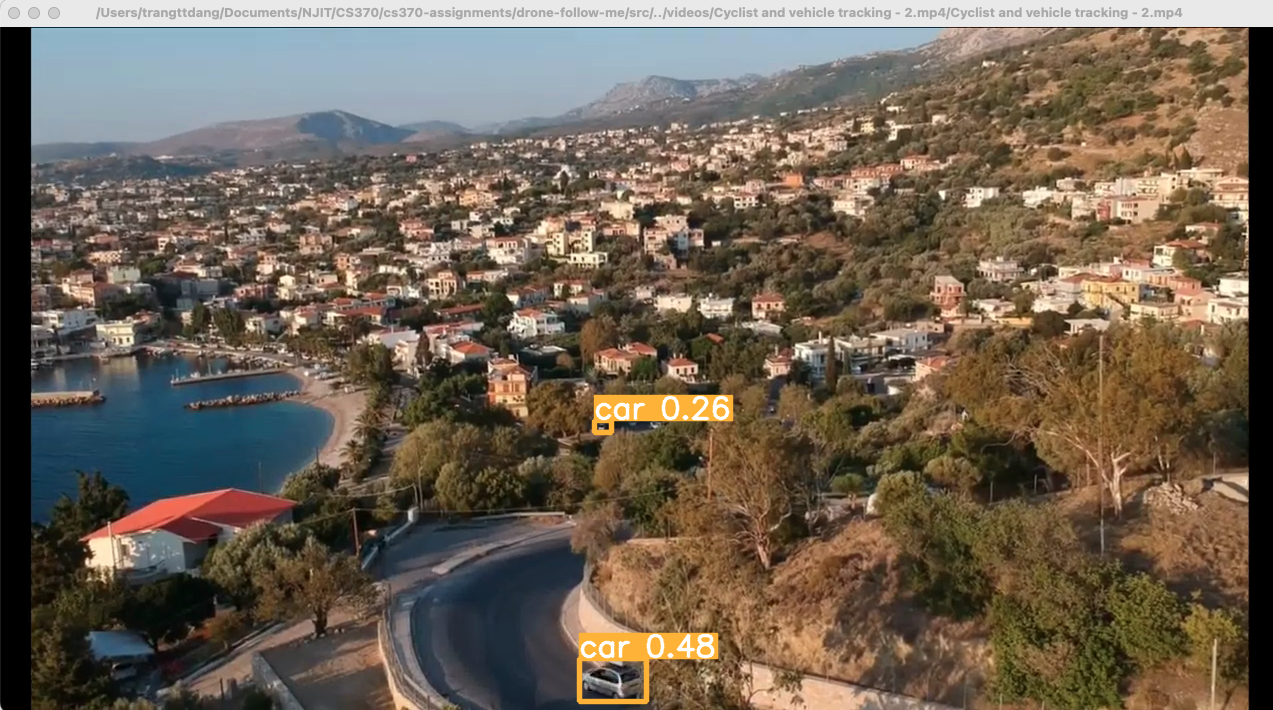

In [59]:
from IPython.display import Image

image_path = './output_videos/predicted-2.png'  # Update this with the path to your image file

Image(filename=image_path)


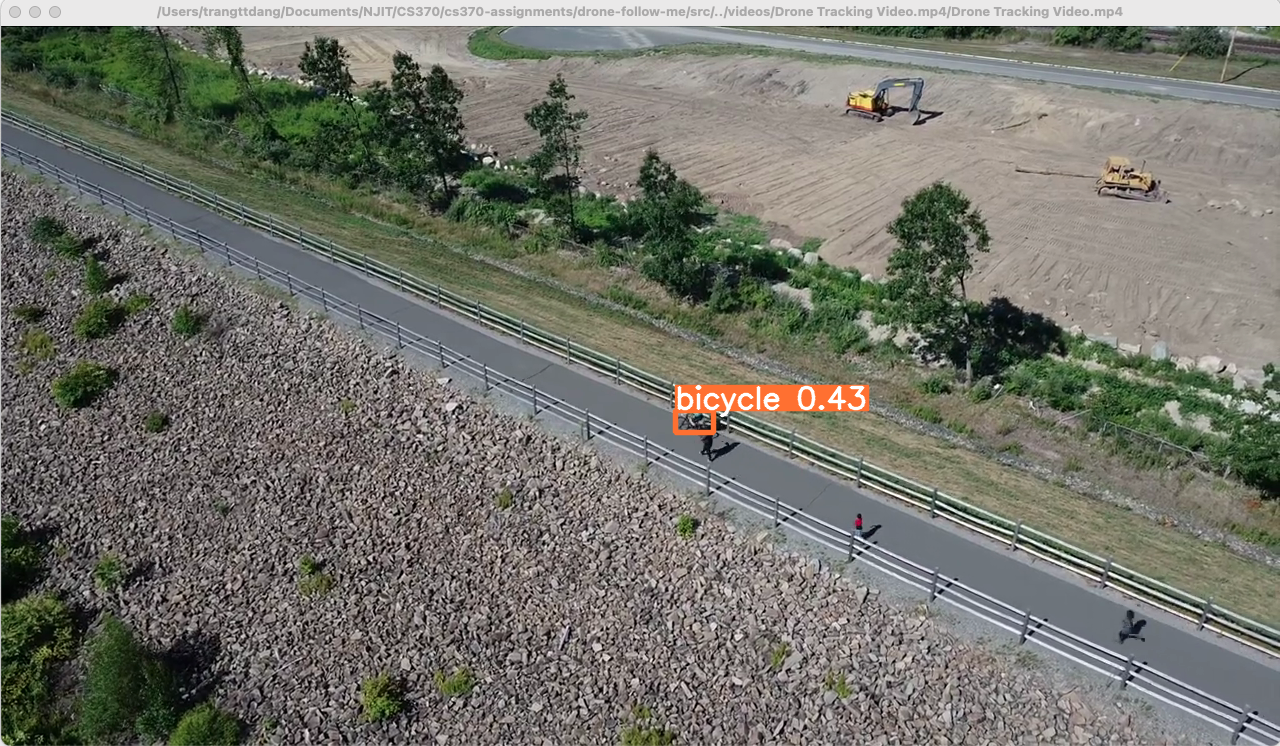

In [60]:
from IPython.display import Image

image_path = './output_videos/predicted-3.png'  # Update this with the path to your image file

Image(filename=image_path)


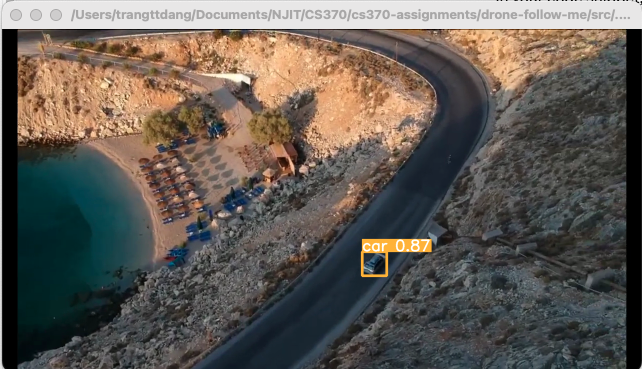

In [61]:
from IPython.display import Image

image_path = './output_videos/predicted.png'  # Update this with the path to your image file

Image(filename=image_path)


## 2.3 Save object detections

In [6]:
# Function to convert YOLOv8 bounding box format to (x, y, w, h)
def yolo_to_xywh(box):
    x1, y1, x2, y2 = box
    return x1, y1, x2 - x1, y2 - y1

In [5]:
import json

video3 = "../videos/Drone Tracking Video.mp4/Drone Tracking Video.mp4"
cap = cv2.VideoCapture(video3)

# List to store the bounding box information for each frame
bbox_info_all_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, verbose=False)
    result = results[0]
    bbox_info_list = []  # List to store bounding box information for this frame
    if len(result.boxes) > 0:
        for box in result.boxes:
            detectedObjId = box.cls[0].item()
            cords = box.xyxy[0].tolist()
            # Scaling bounding box coordinates to range 0-1
            img_height, img_width, _ = frame.shape
            bbox_info = [cords[0] / img_width, cords[1] / img_height, cords[2] / img_width, cords[3] / img_height]
            bbox_info_list.append([detectedObjId] + bbox_info + [round(box.conf[0].item(), 2)])
    bbox_info_all_frames.append(bbox_info_list)
        
# Save the bounding box information in JSON format
with open('bounding_boxes_v3.json', 'w') as json_file:
    json.dump(bbox_info_all_frames, json_file)

In [6]:
import json

video2 = "../videos/Cyclist and vehicle tracking - 2.mp4/Cyclist and vehicle tracking - 2.mp4"
cap = cv2.VideoCapture(video2)

# List to store the bounding box information for each frame
bbox_info_all_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, verbose=False)
    result = results[0]
    bbox_info_list = []  # List to store bounding box information for this frame
    if len(result.boxes) > 0:
        for box in result.boxes:
            detectedObjId = box.cls[0].item()
            cords = box.xyxy[0].tolist()
            # Scaling bounding box coordinates to range 0-1
            img_height, img_width, _ = frame.shape
            bbox_info = [cords[0] / img_width, cords[1] / img_height, cords[2] / img_width, cords[3] / img_height]
            bbox_info_list.append([detectedObjId] + bbox_info + [round(box.conf[0].item(), 2)])
    bbox_info_all_frames.append(bbox_info_list)
        
# Save the bounding box information in JSON format
with open('bounding_boxes_v2.json', 'w') as json_file:
    json.dump(bbox_info_all_frames, json_file)

In [7]:
import json

video1 = "../videos/Cyclist and vehicle tracking - 1.mp4/Cyclist and vehicle tracking - 1.mp4"
cap = cv2.VideoCapture(video1)

# List to store the bounding box information for each frame
bbox_info_all_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, verbose=False)
    result = results[0]
    bbox_info_list = []  # List to store bounding box information for this frame
    if len(result.boxes) > 0:
        for box in result.boxes:
            detectedObjId = box.cls[0].item()
            cords = box.xyxy[0].tolist()
            # Scaling bounding box coordinates to range 0-1
            img_height, img_width, _ = frame.shape
            bbox_info = [cords[0] / img_width, cords[1] / img_height, cords[2] / img_width, cords[3] / img_height]
            bbox_info_list.append([detectedObjId] + bbox_info + [round(box.conf[0].item(), 2)])
    bbox_info_all_frames.append(bbox_info_list)
        
# Save the bounding box information in JSON format
with open('bounding_boxes_v1.json', 'w') as json_file:
    json.dump(bbox_info_all_frames, json_file)

# Step 3: Kalman Filter

## 3.1 Implement Kalman filters
- Use the `filterpy` library to implement Kalman filters that will track the cyclist and the vehicle (if present) in the video.
- Use the detections from the previous task to initialize and run the Kalman filter.

In [1]:
from filterpy.kalman import KalmanFilter
import numpy as np
import json

# Function to create a new Kalman filter instance
def create_kalman_filter():
    kf = KalmanFilter(dim_x=2, dim_z=2)
    kf.x = np.array([[0., 0.], [0., 0.]])  # Initial state estimate (position and velocity)
    kf.P *= 100  # Initial covariance matrix
    kf.F = np.array([[1., 1.], [0., 1.]])  # Set the process model (constant velocity model)
    kf.H = np.array([[1., 0.], [0., 1.]])  # Set the measurement model (position only)
    kf.Q = np.array([[0.1, 0.1], [0.1, 0.1]])  # Set the process noise covariance matrix
    kf.R = 4  # Set the measurement noise covariance matrix
    return kf

# Load detections from JSON file
with open('./bounding_boxes_v2.json', 'r') as json_file:
    detections = json.load(json_file)

# Dictionary to hold tracks in the format {frameID:{track_id:[x,y,x,y]}}
tracks = {}

# Threshold for associating a detection with an existing track
threshold_distance = 0.1  # Adjust as needed

# Loop through the measurements and update the Kalman filters
# Loop through the measurements and update the Kalman filters
for frame_id, frame_detections in enumerate(detections):
    for detection in frame_detections:
        object_id, x1, y1, x2, y2, conf = detection
        bbox_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
        
        # Check if any existing tracks exist for the current frame
        if frame_id in tracks:
            min_distance = float('inf')
            closest_track_id = None
            
            # Find the closest track
            for track_id, track_data in tracks[frame_id].items():
                # Access the estimated position of the track
                position_x = track_data[-2]
                position_y = track_data[-1]
                
                # Calculate distance between current detection and track's last position
                distance = np.sqrt((bbox_center[0] - position_x)**2 + (bbox_center[1] - position_y)**2)
                
                # Update closest track if the distance is smaller than the threshold
                if distance < min_distance and distance < threshold_distance:
                    min_distance = distance
                    closest_track_id = track_id
            
            # If a closest track is found, associate the detection with it
            if closest_track_id is not None:
                kf = create_kalman_filter()
                kf.predict()
                kf.update(bbox_center)
                # print(f"Frame: {frame_id}, Associated with Track ID: {closest_track_id}")
                # Update position for the track
                position_x = kf.x[0][0]
                position_y = kf.x[1][0]
                
                # Store position in the tracks dictionary
                if frame_id not in tracks:
                    tracks[frame_id] = {}
                if closest_track_id not in tracks[frame_id]:
                    tracks[frame_id][closest_track_id] = []
                # tracks[frame_id][closest_track_id].extend([position_x, position_y])
                continue  # Move to the next detection
        
        # If no existing tracks or no close tracks found, create a new track
        new_track_id = len(tracks.get(frame_id, {})) + 1
        kf = create_kalman_filter()
        kf.predict()
        kf.update(bbox_center)
        
        # Store position for the new track
        position_x = kf.x[0][0]
        position_y = kf.x[1][0]
        if frame_id not in tracks:
            tracks[frame_id] = {}
        tracks[frame_id][new_track_id] = [position_x, position_y]
        # print(f"Frame: {frame_id}, New Track ID: {new_track_id}")
        
# Print the tracks
# print(tracks)


## 3.2 Visualize trajectory

In [2]:
import cv2

video1 = "../videos/Cyclist and vehicle Tracking - 1.mp4/Cyclist and vehicle Tracking - 1.mp4"
video2 = "../videos/Cyclist and vehicle tracking - 2.mp4/Cyclist and vehicle tracking - 2.mp4"
video3 = "../videos/Drone Tracking Video.mp4/Drone Tracking Video.mp4"
objs = ['pedestrian', 'people', 'bicycle','car']
# Load video file
cap = cv2.VideoCapture(video2)
output_video_path = "output_trajectory_v2.mp4"  # Change this to your desired output path with .mp4 extension

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use mp4v codec for mp4 format
output_video = cv2.VideoWriter(output_video_path, fourcc, 25.0, (int(cap.get(3)), int(cap.get(4))))

frame_ID = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    for detection in detections[frame_ID]:
        objID, x1, y1, x2, y2, conf = detection
        x1 = int(x1*frame.shape[1])
        x2 = int(x2*frame.shape[1])
        y1 = int(y1*frame.shape[0])
        y2 = int(y2*frame.shape[0])
        cv2.rectangle(frame, (x1,y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'{objs[int(objID)]}', (x1+10, y1-3), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 0), 2)
    # Draw bounding boxes and IDs
    if frame_ID in tracks:
        for track_id, track_data in tracks[frame_ID].items():
            for i in range(1, 25):  # Start from 1 to avoid current frame
                if frame_ID + i in tracks and track_id in tracks[frame_ID + i]:
                    pos_x, pos_y = tracks[frame_ID + i][track_id]
                    cv2.circle(frame, (int(pos_x*frame.shape[1]), int(pos_y*frame.shape[0])), 3, (0, 0, 255), 3)

    output_video.write(frame)
    cv2.imshow('Frame', frame)
    k = cv2.waitKey(30)

    if k == ord("q"):
        break

    frame_ID += 1

cap.release()
output_video.release()
cv2.destroyAllWindows()


: 

Compressed output videos:
- [Video 1](https://github.com/trangttdang/cs370-assignments/blob/main/drone-follow-me/src/output_videos/output_trajectory_1_compressed.mp4)
- [Video 2](https://github.com/trangttdang/cs370-assignments/blob/main/drone-follow-me/src/output_videos/output_trajectory_2_compressed.mp4)
- [Video 3](https://github.com/trangttdang/cs370-assignments/blob/main/drone-follow-me/src/output_videos/output_trajectory_3_compressed.mp4)

I've implemented several techniques to address false positives when tracking objects using Kalman filters:

1. Associate each detection with an existing track if the distance between the detection and the track's last position is smaller than a predefined threshold (threshold_distance). This helps in reducing false positives by ensuring that detections are only associated with existing tracks if they are sufficiently close.

2. For each detection associated with an existing or new track, I utilize Kalman filters to predict the next state and update it based on the detection. Kalman filters help incorporate measurements while maintaining object's state, which helps in filtering out noise and reducing false positives.

3. By using the threshold_distance parameter, I effectively filter out detections that are too far from any existing track, reducing the chances of false positives being associated with tracks.

4. If no existing tracks or close tracks are found for a detection, I create a new track. This ensures that if a detection does not match any existing tracks, it is treated as a new object rather than falsely associating it with an existing track.

Another technique that I will implement in the future:
1. Check the overlap of bounding boxes between consecutive frames. If a new detection has significant overlap with a tracked object's bounding box, it's likely a correct detection. Otherwise, it might be a false positive.